**1. Install Libraries**

In [1]:
pip install pandas numpy matplotlib seaborn

**2. Import them**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

**3. Load Dataset**

In [3]:
import pandas as pd
from google.colab import files
import os

file_name = "Sample-Netflix dataset(project 2).csv"

# Check if the file exists. If not, prompt the user to upload it.
if not os.path.exists(file_name):
  print(f"The file '{file_name}' was not found. Please upload it.")
  uploaded = files.upload() # This will open a file upload dialog in the browser
  if file_name not in uploaded:
    print(f"File '{file_name}' was not uploaded. Please try again.")
  else:
    print(f"File '{file_name}' uploaded successfully.")

# Now try to read the CSV. If the user uploaded it, this should work.
df = pd.read_csv(file_name)
df

The file 'Sample-Netflix dataset(project 2).csv' was not found. Please upload it.


Saving Sample-Netflix dataset(project 2).csv to Sample-Netflix dataset(project 2).csv
File 'Sample-Netflix dataset(project 2).csv' uploaded successfully.


,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...
77796,736339,tm1059008,Adelaida Buscato,María Paz,ACTOR
77797,399499,tm1059008,Luz Stella Luengas,Karen Bayona,ACTOR
77798,373198,tm1059008,Inés Prieto,Fanny,ACTOR
77799,378132,tm1059008,Isabel Gaona,Cacica,ACTOR


**4. Check First Few Rows**

In [4]:
df.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


**5. Understand Dataset Structure**

(a)See Shape

Meaning:

-> Rows = number of records (movies/shows)

-> Columns = features

In [5]:
df.shape

(77801, 5)

(b)See Column Names

In [6]:
df.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

(c)See Data Types+Nulls

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


(d)Summary statistics(for numeric columns)

In [8]:
df.describe()

,person_id
count,7.780100e+04
mean,5.294888e+05
std,6.430167e+05
min,7.000000e+00
25%,4.530600e+04
50%,1.983580e+05
75%,8.880960e+05
max,2.462818e+06


from matplotlib import pyplot as plt
_df_0['person_id'].plot(kind='hist', bins=20, title='person_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['person_id'].plot(kind='line', figsize=(8, 4), title='person_id')
plt.gca().spines[['top', 'right']].set_visible(False)

**6. Data Cleaning**

🎯 Rule:

Important columns → fill or drop carefully

Unimportant columns → drop

In [9]:
df.isnull().sum()

,0
person_id,0
id,0
name,0
character,9772
role,0


Check Duplicates

In [14]:
df.duplicated().sum()

np.int64(0)

**7. Exploratory Data Analysis**

(a)Total Movies vs TV Shows?

In [20]:
df['name'].value_counts()

,count
name,
Boman Irani,25
Kareena Kapoor Khan,25
Shah Rukh Khan,23
Takahiro Sakurai,21
Priyanka Chopra Jonas,20
...,...
Sangyoon Lee,1
Bae Young-ran,1
Park Jeong-gi,1


Visualize

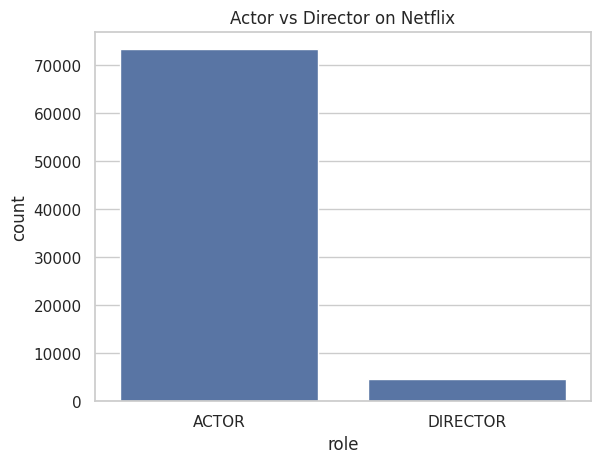

In [22]:
sns.countplot(x='role', data=df)
plt.title("Actor vs Director on Netflix")
plt.show()

=> Actors Are Morethan Directors

(b)Which Character Produce More Netflix Content

In [26]:
df['character'].value_counts().head(10)

,count
character,
Self,1950
Himself,1276
Herself,426
Self (archive footage),330
Dancer,149
(voice),128
Additional Voices (voice),127
Nurse,77
Doctor,60


(c)Which Actor Produce More Netflix Content

In [28]:
df['name'].value_counts().head(10)

,count
name,
Boman Irani,25
Kareena Kapoor Khan,25
Shah Rukh Khan,23
Takahiro Sakurai,21
Priyanka Chopra Jonas,20
Paresh Rawal,20
Raúl Campos,20
Amitabh Bachchan,20
Nawazuddin Siddiqui,19


Graph

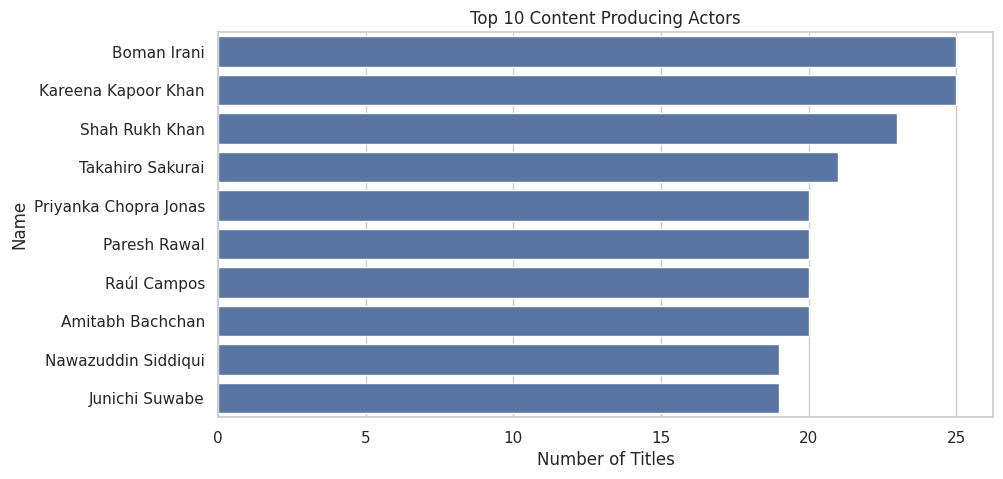

In [30]:
top_actors = df['name'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title("Top 10 Content Producing Actors")
plt.xlabel("Number of Titles")
plt.ylabel("Name")
plt.show()

(d)Which Character Is Most Common

In [37]:
df['character'].value_counts()

,count
character,
Self,1950
Himself,1276
Herself,426
Self (archive footage),330
Dancer,149
...,...
Peichia,1
Chinchin's Father,1
Personell Officer,1


Graph

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38634 (\N{CJK UNIFIED IDEOGRAPH-96EA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24052 (\N{CJK UNIFIED IDEOGRAPH-5DF4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26446 (\N{CJK UNIFIED IDEOGRAPH-674E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31456 (\N{CJK UNIFIED IDEOGRAPH-7AE0}) missing from font(s) DejaVu Sans.
  fig.canvas

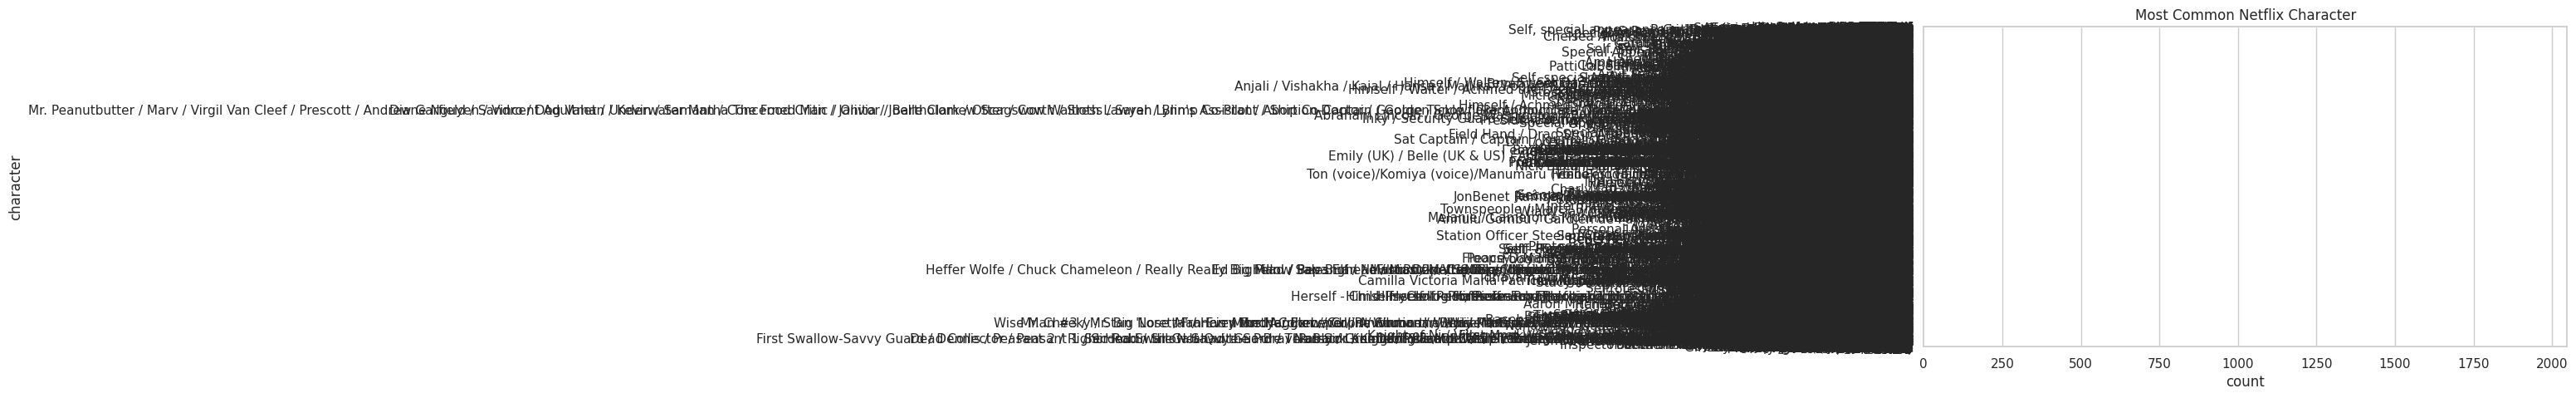

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(y='character', data=df, order=df['character'].value_counts().index)
plt.title("Most Common Netflix Character")
plt.show()

**7. Most Appearing Actors**

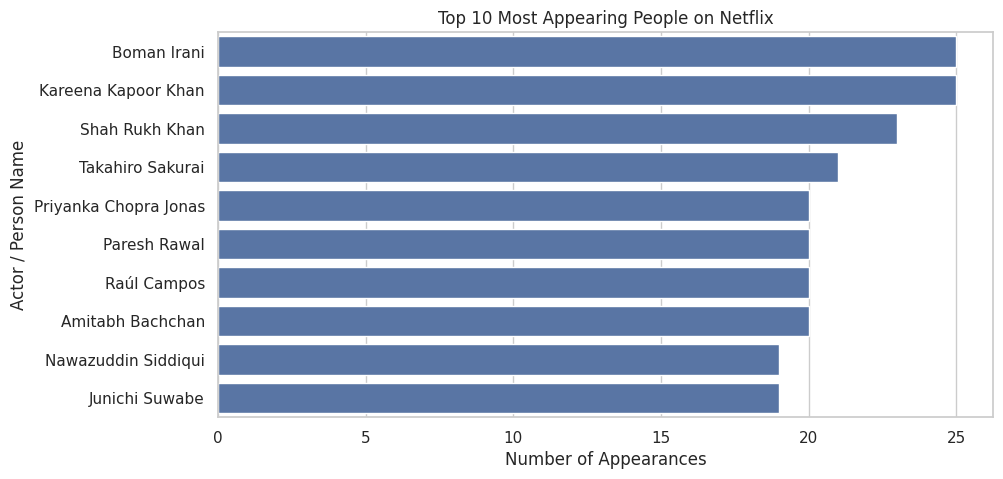

In [40]:
top_actors = df['name'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title("Top 10 Most Appearing People on Netflix")
plt.xlabel("Number of Appearances")
plt.ylabel("Actor / Person Name")
plt.show()

**8. Role Frequency**

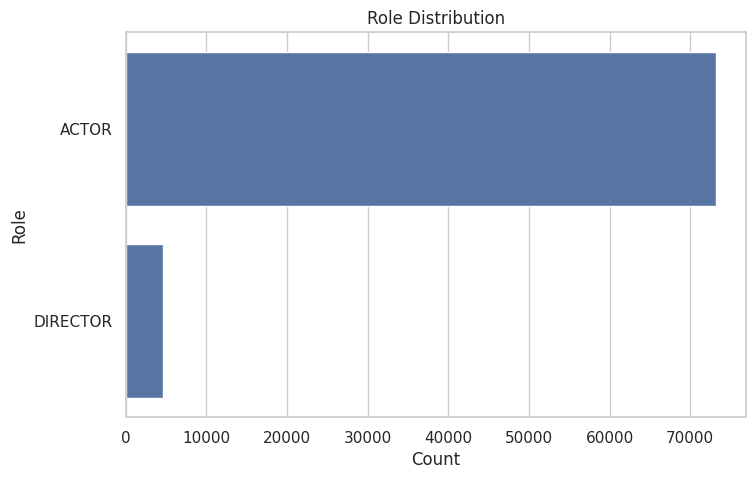

In [41]:
role_count = df['role'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=role_count.values, y=role_count.index)
plt.title("Role Distribution")
plt.xlabel("Count")
plt.ylabel("Role")
plt.show()

**9. Trend Graph**

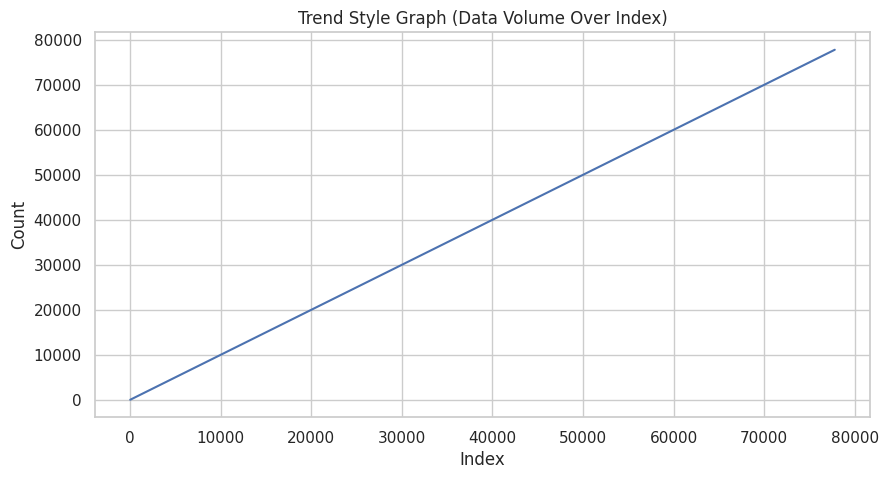

In [42]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df.index)
plt.title("Trend Style Graph (Data Volume Over Index)")
plt.xlabel("Index")
plt.ylabel("Count")
plt.show()

**END**